In [ ]:
part 3: 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Select useful columns and drop rows with missing values
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'fare', 'embarked']]
df.dropna(inplace=True)

# Encode categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Define features and target
X = df.drop('survived', axis=1)
y = df['survived']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (Optional) Train Decision Tree for comparison
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Decision Tree - Accuracy: 0.6923076923076923
Decision Tree - Precision: 0.6666666666666666
Decision Tree - Recall: 0.6031746031746031

Random Forest - Accuracy: 0.7902097902097902
Random Forest - Precision: 0.7704918032786885
Random Forest - Recall: 0.746031746031746


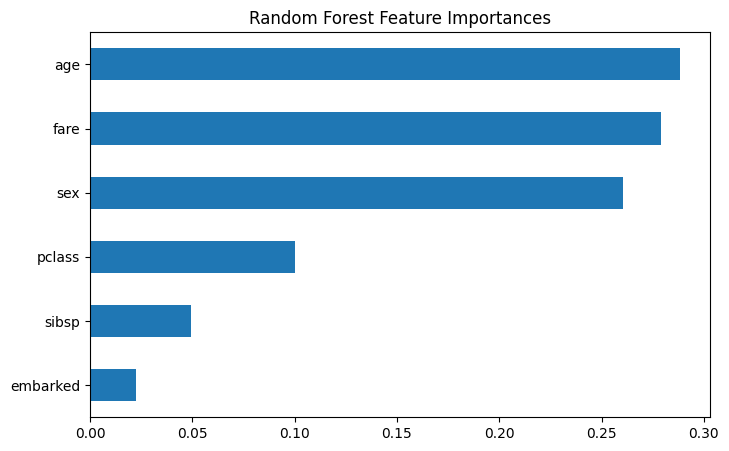

In [4]:
# Task 8: Random Forest vs Decision Tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Decision Tree (already trained as clf)
y_pred_dt = clf.predict(X_test)

# Metrics
print("Decision Tree - Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree - Precision:", precision_score(y_test, y_pred_dt))
print("Decision Tree - Recall:", recall_score(y_test, y_pred_dt))

print("\nRandom Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Precision:", precision_score(y_test, y_pred_rf))
print("Random Forest - Recall:", recall_score(y_test, y_pred_rf))

# Feature Importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8, 5), title='Random Forest Feature Importances')
plt.show()


In [5]:
# Task 9: AdaBoost / Gradient Boosting

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score
import time

# Optional: use the same Titanic dataset

# Train AdaBoost
start = time.time()
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
ada_time = time.time() - start
y_pred_ada = ada.predict(X_test)

# Train Gradient Boosting
start = time.time()
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_time = time.time() - start
y_pred_gb = gb.predict(X_test)

# Metrics Comparison
print("Decision Tree - Accuracy:", accuracy_score(y_test, y_pred_dt), "F1:", f1_score(y_test, y_pred_dt))
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf), "F1:", f1_score(y_test, y_pred_rf))

print("AdaBoost - Accuracy:", accuracy_score(y_test, y_pred_ada), "F1:", f1_score(y_test, y_pred_ada), f"Time: {ada_time:.2f}s")
print("Gradient Boosting - Accuracy:", accuracy_score(y_test, y_pred_gb), "F1:", f1_score(y_test, y_pred_gb), f"Time: {gb_time:.2f}s")


Decision Tree - Accuracy: 0.6923076923076923 F1: 0.6333333333333333
Random Forest - Accuracy: 0.7902097902097902 F1: 0.7580645161290323
AdaBoost - Accuracy: 0.8321678321678322 F1: 0.7931034482758621 Time: 0.39s
Gradient Boosting - Accuracy: 0.7762237762237763 F1: 0.7192982456140351 Time: 0.30s
